In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#### Data Loading

In [34]:
df = pd.read_csv('../zuu crew scores.csv')
df = df[df['CourseName']=='Foundations of ML']
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


In [35]:
X = df['Attendance'].values
Y = df['CapstoneScore'].values
X

array([79.9, 76.8, 96.6, 83.2, 86.5, 76.6, 83.8, 90. , 68.4, 95.9, 68.2,
       67.6, 61.5, 82.6, 78.1, 66.2, 94.5, 70.8, 66.2, 86.4, 68.9, 69.2,
       64.2, 92. , 86.1, 94.2, 75.9, 68.2, 95.9, 60.5, 83.3, 95.7, 92.7,
       70.4, 75.2, 83.6, 70.7, 71.8, 97.9, 79.5, 60.9, 70.7, 81.7, 85.3,
       70.3, 65.6, 93.4, 99.4, 70.9, 60.7, 64.7, 83.1, 71. , 65.5, 95. ,
       83.9, 67. , 96.6, 76.8, 63.3, 69.8, 75.6, 71.5, 82.7, 79. , 86.5,
       97.5, 89.3, 68.6, 79.9, 83.9, 90.8])

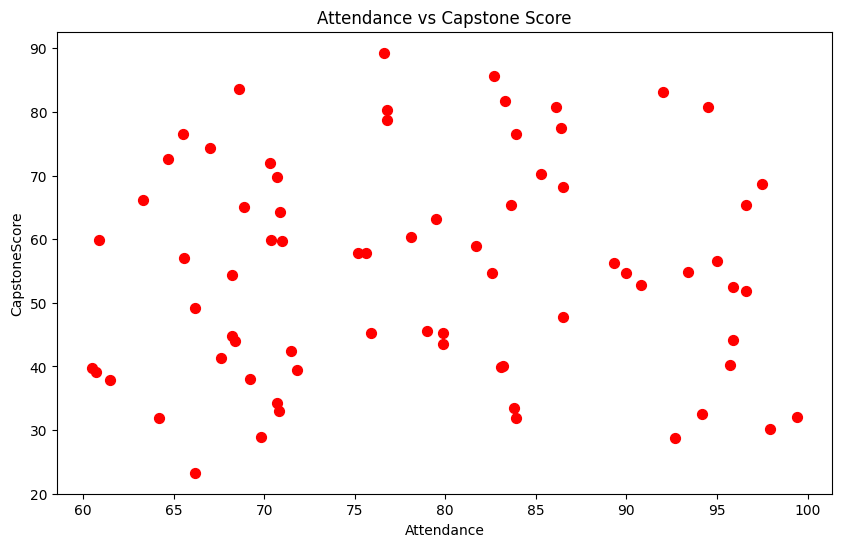

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(X,Y,color='red',s=50)
plt.xlabel('Attendance')
plt.ylabel('CapstoneScore')
plt.title('Attendance vs Capstone Score')
plt.show()

In [37]:
degree = 3

#### Polynomial Feature 

In [38]:
n = len(X)

X_scaled = (X - X.mean()) / X.std()

# Polynomial features
X_poly = np.ones((n, degree + 1))
for i in range(1, degree + 1):
    X_poly[:, i] = X_scaled**i


#### Compute cost

In [39]:
def compute_cost(X,beta,Y):
    y_hat = X.dot(beta) 
    m = len(Y)
    cost = (1 /(2 * m)) * np.sum((y_hat - Y)**2)
    return cost

#### Optimization

In [40]:
cost_history=[]
def gradient_descent(X,Y,beta,n_iter,lr):
    m = len(Y)

    for i in range(n_iter):
        y_hat = X.dot(beta) 
        gradient = (1/m) * X.T.dot(y_hat - Y)
        beta = beta - lr * gradient
        cost  = compute_cost(X,beta,Y)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"iteration: {i}, beta:{beta}, cost:{cost}")
    
    return beta


In [ ]:
# setting initial value for beta, numbe iterations and learning rate
X_with_bias = X_poly
beta = np.random.randn(degree + 1)
n_iter = 10000
lr = 0.01

In [ ]:
# getting updated beta values
beta = gradient_descent(X_with_bias,Y,beta,n_iter,lr)

iteration: 0, beta:[ 1.4230151  -0.69808708  0.90220696 -0.39772196], cost:1544.1806184075188
iteration: 100, beta:[27.6958146  -1.16816001 14.33550725 -0.65588119], cost:361.71333702342935
iteration: 200, beta:[37.36883848 -0.30735552 10.55025879 -1.051064  ], cost:249.85032834317795
iteration: 300, beta:[43.54251937  0.62046179  6.60639244 -1.08225951], cost:194.92633693483643
iteration: 400, beta:[47.9485771   1.36918471  3.63209309 -1.10090356], cost:165.90845997335018
iteration: 500, beta:[51.14293772  1.959741    1.463956   -1.13297869], cost:150.5498252293842
iteration: 600, beta:[53.46351602  2.427645   -0.1091327  -1.1745297 ], cost:142.4144568358212
iteration: 700, beta:[55.14968304  2.80127735 -1.24927777 -1.22082835], cost:138.10053945069194
iteration: 800, beta:[56.37483591  3.10207279 -2.07507099 -1.26853362], cost:135.8094749248144
iteration: 900, beta:[57.26495084  3.3461788  -2.67273757 -1.31546213], cost:134.59004239959384
iteration: 1000, beta:[57.91158566  3.5458142

#### Analyze Cost

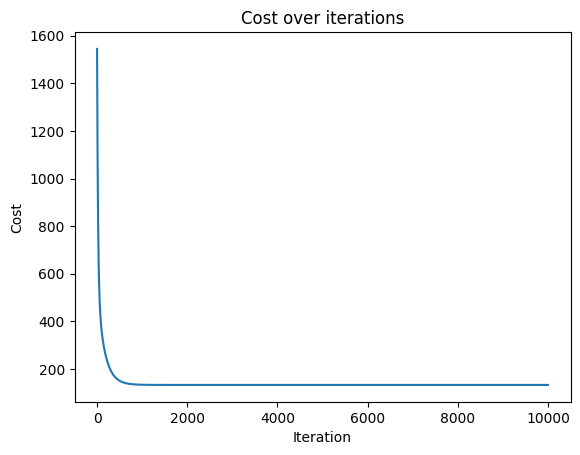

In [43]:

plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost over iterations')
plt.show()

#### Predict Function

In [44]:
def predict(X,beta,degree):
    n = len(X)

    X_scaled = (X - X.mean()) / X.std()

    # Polynomial features
    X_poly = np.ones((n, degree + 1))
    for i in range(1, degree + 1):
        X_poly[:, i] = X_scaled**i
    return X_poly.dot(beta)

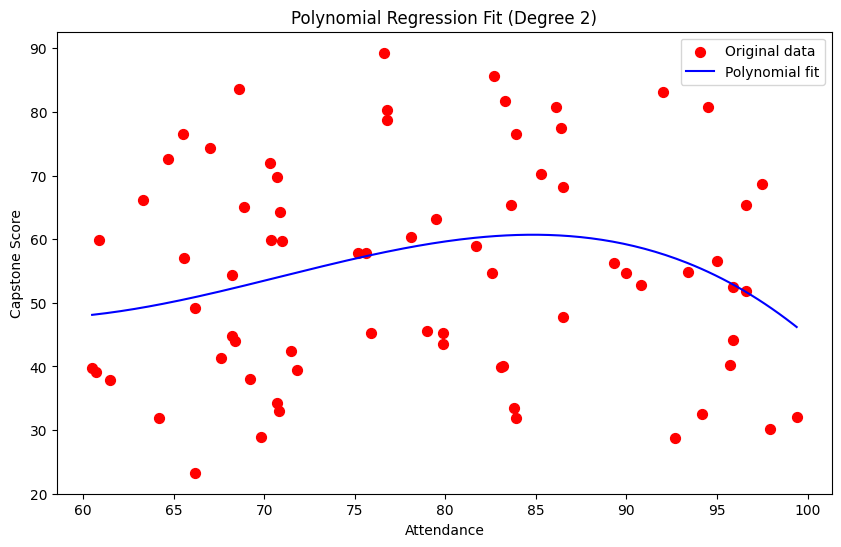

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y, color='red', s=50, label='Original data')

X_line = np.linspace(min(X), max(X), 200)
Y_line = predict(X_line, beta, degree)

plt.plot(X_line, Y_line, color='blue', label='Polynomial fit')
plt.xlabel('Attendance')
plt.ylabel('Capstone Score')
plt.title('Polynomial Regression Fit (Degree 2)')
plt.legend()
plt.show()

#### Model Evaluation

In [46]:
Y_hat = predict(X, beta, degree)
Y_hat

array([60.0221581 , 58.64848581, 49.39854141, 60.68643866, 60.26410098,
       58.54036018, 60.69835783, 58.32877035, 53.06053299, 50.72131267,
       52.91938139, 52.49917596, 48.85570376, 60.63859822, 59.29806457,
       51.54533911, 53.08294925, 54.77167355, 51.54533911, 60.29545998,
       53.41521347, 53.62895754, 50.2813644 , 56.41460641, 60.38214234,
       53.54129282, 58.14645032, 52.91938139, 50.72131267, 48.43584677,
       60.6909634 , 51.08159575, 55.59115082, 54.48645929, 57.73043265,
       60.69847587, 54.70045519, 55.47881092, 46.67986044, 59.8807306 ,
       48.59578499, 54.70045519, 60.50302333, 60.56038581, 54.41503867,
       51.15186393, 54.68394517, 43.10117329, 54.84282262, 48.51444185,
       50.58376319, 60.6809161 , 54.91389492, 51.08736139, 52.28206403,
       60.69673845, 52.08510259, 49.39854141, 58.64848581, 49.76444628,
       54.05760768, 57.97071435, 55.26784274, 60.64899752, 59.68778545,
       60.26410098, 47.55338809, 58.85324932, 53.20212631, 60.02

In [47]:
def MSE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.mean(e_i**2)

def MAE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.mean(np.abs(e_i))

def R2_Score(Y,Y_hat):
    y_mean = np.mean(Y)
    e_i = Y - Y_hat
    std_i = Y - y_mean

    E = np.sum(e_i**2) / np.sum(std_i ** 2)
    return 1 - E

def RMSE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.sqrt(np.mean((Y - Y_hat) ** 2))

In [48]:
mse = MSE(Y, Y_hat)
mae = MAE(Y, Y_hat)
r2 = R2_Score(Y, Y_hat)
rmse = RMSE(Y,Y_hat)

print(f"MSE : {mse}")
print(f"MAE : {mae}")
print(f"R2 Score : {r2}")
print(f"RMSE : {rmse}")

MSE : 266.32831119587803
MAE : 13.831030936021104
R2 Score : 0.06789832501421345
RMSE : 16.319568352008517
